# Clustering Algorithms

## K Means

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import random

In [57]:
X, y = make_blobs(n_samples=100, centers=8, random_state=42)

X.shape, y.shape


((100, 2), (100,))

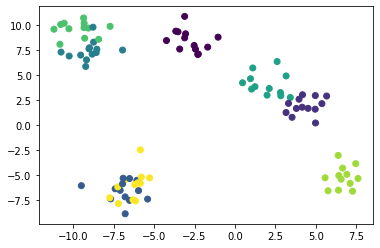

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y)

### Sklearn

In [4]:
from sklearn.cluster import KMeans

In [5]:
model = KMeans(n_clusters=2)

In [6]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
model.cluster_centers_

array([[ 4.60840443,  2.16998192],
       [-2.70292301,  8.89011496]])

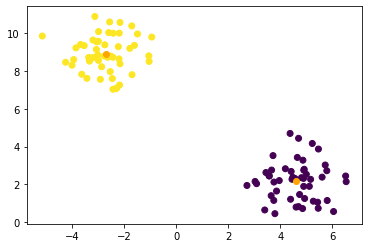

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for centre in model.cluster_centers_:
    plt.scatter(centre[0], centre[1], color='orange')

### Custom

In [30]:
class Cluster:
    def __init__(self, center, label):
        self.center = center
        self.label = label
        self.points = []
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((self.center - point)**2))

In [50]:

class KMeans:
    '''
    n_clusters : int, default=5
        The number of clusters to form as well as the number of
        centroids to generate.
    
    n_init : int, default=10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.

    max_iter : int, default=300
        Maximum number of iterations of the k-means algorithm for a
        single run.
    '''
    
    def __init__(self, n_clusters=5, n_init=10, max_iters=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iters = max_iters
        
    def fit(self, X):
        self.__X = X
        
        steps = []
        
        for i in range(self.n_init):
            
            clusters = []
            
            for j in range(self.n_clusters):
                cluster = Cluster(random.choice(self.__X), j)
                
                clusters.append(cluster)
            
            errors = []
            
            for j in range(self.max_iters):
                labels = []
                
                for point in X:
                    distances = []
                    
                    for cluster in clusters:
                        distances.append((cluster.distance(point), cluster))
                        
                    index = np.array(distances)[:, 0].argmin()
                    
                    selected_dis, selected_cluster = distances[index]
                    
                    selected_cluster.points.append(point)
                    labels.append(selected_cluster.label)
                    
                for cluster in clusters:
                    cluster.relocate()
                    
                errors.append(self.error(labels, clusters))
                
                final_error = errors[-1]
                
                steps.append((final_error, labels, clusters))
                
            index = np.array(steps)[:, 0].argmin()
            
            result_error, self.labels_, result_clusters = steps[index]
            
            self.cluster_centers_ = [cluster.center for k in result_clusters]
            
            return result_error
        
    def error(self, labels, clusters):
        err = 0
            
        for point, label in zip(self.__X, labels):
            cluster = clusters[label]
                
            err += cluster.distance(point)
                
        return err

In [66]:
model = KMeans(n_clusters=8)

In [67]:
model.fit(X)

131.80406911763234

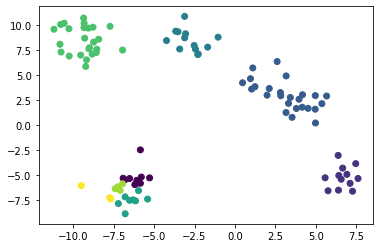

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

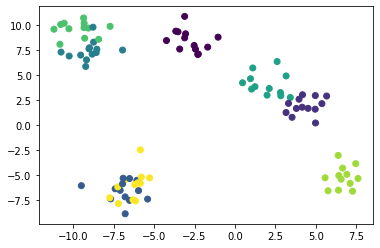

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## KMedian

k-means minimizes within-cluster variance, which equals squared Euclidean distances. In general, the arithmetic mean does this. It does not optimize distances, but squared deviations from the mean. k-medians minimizes absolute deviations, which equals Manhattan distance.

In general, the per-axis median should do this. It is a good estimator for the mean, to minimize the sum of absolute deviations (that is sum_i abs(x_i-y_i)), instead of the squared ones.

Difference, in comparision to KMeans
* **Distance is Taxicab metric, instead of Squared Euclidean Distance (K-Means)**

## Expectation Maximisation (EM)

Expectation Maximization (EM) maximizes the likelihood to find the statistical parameters of the underlying sub-populations in the dataset. The EM algorithm alternates between two steps (E-step and M-step). In the E-step the algorithm tries to find a lower bound function on the original likelihood using the current estimate of the statistical parameters. In the M-step the algorithm finds new estimates of those statistical parameters by maximizing the lower bound function (i.e. determine the MLE of the statistical parameters). Since at each step we maximize the lower bound function, the algorithm always produces estimates with higher likelihood than the previous iteration and ultimately converge to a maxima.

Unlike K-means, in EM, the clusters are not limited to spherical shapes. In EM we can constrain the algorithm to provide different covariance matrices (spherical, diagonal and generic). These different covariance matrices in return allow us to control the shape of our clusters and hence we can detect sub-populations in our data with different characteristics.

## Hierarchical Clustering

Hierarchical clustering (hierarchical cluster analysis), is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In K-Means, the number of optimal clusters was found using the elbow method. In hierarchical clustering, the dendrograms are used for this purpose. The below lines of code plot a dendrogram for our dataset.